In [1]:
# All imports
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma
from skimage.util import random_noise
from skimage.color import rgb2gray
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc
import matplotlib.pyplot as plt


In [2]:
# Plotting the images
def plot_image(image, title, ax):
    ax.imshow(image)
    ax.set_title(title)
    ax.axis('off')

# Function to add blur based on type
def add_blur(im, type: str, axs, axisIndex):
    # Apply Blur based on type
    for sz_idx, sz in enumerate([3, 7, 11]):
        match(type):
            case "min":
                im1 = im.filter(ImageFilter.MinFilter(size=sz))
            case "max":
                im1 = im.filter(ImageFilter.MaxFilter(size=sz))
            case "medium":
                im1 = im.filter(ImageFilter.MedianFilter(size=sz))
            case "bilateral":
                im1 = im.filter(ImageFilter.GaussianBlur(radius=sz))
        axs[axisIndex-1, sz_idx+1].imshow(im1)
        axs[axisIndex-1, sz_idx+1].set_title('Output (Min Filter Filter size=' + str(sz) + ')')
        axs[axisIndex-1, sz_idx+1].axis('off')


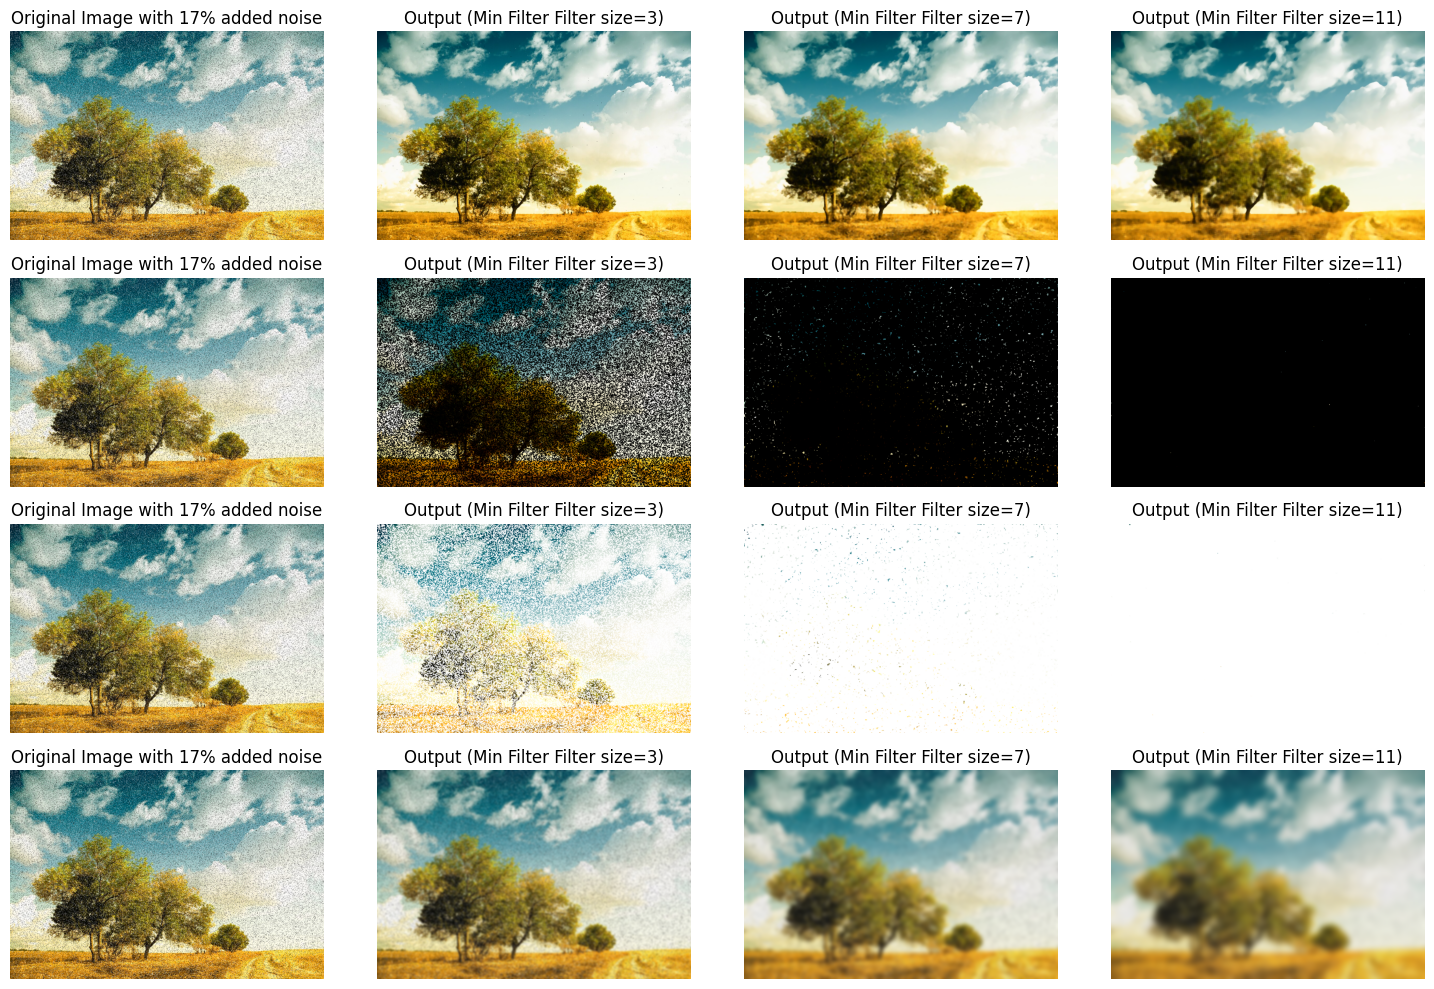

In [3]:
# Number of axis
axisIndex = 1

# Figure size and axis
fig, axs = plt.subplots(1 * 4, 4, figsize=(15, 10))

# Loop to add noise and blur
for prop_noise in np.linspace(0.17, 0.5, 1):
    # Open the selected image
    im = Image.open('scene.jpeg')

    # Choose number of random locations based on width, height, and prop noise
    n = int(im.width * im.height * prop_noise)

    # Find the coordinates of the noise to add to the image
    x, y = np.random.randint(0, im.width, n), np.random.randint(0, im.height, n)

    # Loop through the coordinates and add the noise to the image
    for (x,y) in zip(x,y):
        im.putpixel((x, y), ((0,0,0) if np.random.rand() < 0.5 else (255,255,255)))

    # save the new image with noise
    im.save('scene' + str(prop_noise) + '.jpg')

    # Display the saved image with noise
    axs[axisIndex-1, 0].imshow(im)
    axs[axisIndex-1, 0].set_title('Original Image with ' + str(int(100*prop_noise)) + '% added noise')
    axs[axisIndex-1, 0].axis('off')

    # Add Medium Blur
    add_blur(im, "medium", axs, axisIndex)
    axisIndex += 1

    # Display the saved image with noise
    axs[axisIndex-1, 0].imshow(im)
    axs[axisIndex-1, 0].set_title('Original Image with ' + str(int(100*prop_noise)) + '% added noise')
    axs[axisIndex-1, 0].axis('off')

    # Add Min Filter
    add_blur(im, "min", axs, axisIndex)
    axisIndex += 1

    # Display the saved image with noise
    axs[axisIndex-1, 0].imshow(im)
    axs[axisIndex-1, 0].set_title('Original Image with ' + str(int(100*prop_noise)) + '% added noise')
    axs[axisIndex-1, 0].axis('off')

    # Apply Max Filter
    add_blur(im, "max", axs, axisIndex)
    axisIndex += 1

    # Display the saved image with noise
    axs[axisIndex-1, 0].imshow(im)
    axs[axisIndex-1, 0].set_title('Original Image with ' + str(int(100*prop_noise)) + '% added noise')
    axs[axisIndex-1, 0].axis('off')

    # Apply Bilateral filter
    add_blur(im, "bilateral", axs, axisIndex)
    axisIndex += 1

# Displat all images
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()